In [ ]:
import time
import random


def generate_sensor_data():
    ''' method that randomly generates three variables '''
    temperature = round(random.uniform(-25.0, 90.0), 2)  # Temperature in Celsius
    humidity = round(random.uniform(0.0, 100.0), 2)  # Relative Humidity in %age
    co2_ppm = round(random.uniform(100, 2800), 2)  # CO2 concentration in PPM
    return temperature, humidity, co2_ppm

def simulate_sensor_readings(interval=2, duration=20):
    """
    Simulate sensor readings at regular intervals.
    :param interval: Time interval between readings in seconds.
    :param duration: Total duration to run the simulation in seconds.
    """
    start_time = time.time()
    while time.time() - start_time < duration:
        temp, hum, co2 = generate_sensor_data()
        print(f"Temperature: {temp}°C, Humidity: {hum}%, CO2: {co2} PPM")
        time.sleep(interval)

In [ ]:
simulate_sensor_readings(interval=2, duration=20)

In [ ]:
# Data to be stored
data = [
    {"Temperature": 50.75, "Humidity": 39.87, "CO2": 2496.69},
    {"Temperature": 14.0, "Humidity": 46.39, "CO2": 1523.52},
    {"Temperature": -12.57, "Humidity": 18.86, "CO2": 2674.05},
    {"Temperature": 11.42, "Humidity": 14.21, "CO2": 541.71},
    {"Temperature": 28.13, "Humidity": 96.38, "CO2": 1009.64},
    {"Temperature": 43.31, "Humidity": 16.59, "CO2": 1889.93},
    {"Temperature": 6.81, "Humidity": 67.6, "CO2": 1514.68},
    {"Temperature": -1.09, "Humidity": 85.43, "CO2": 1860.09},
    {"Temperature": 47.41, "Humidity": 16.61, "CO2": 2728.38},
    {"Temperature": 77.77, "Humidity": 1.4, "CO2": 1114.14}
]

In [ ]:
import csv
# Store data in a CSV file
filename = "sensor_data.csv"
with open(filename, "w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["Temperature", "Humidity", "CO2"])
    writer.writeheader()  # Write the header i.e., to describe the contents
    writer.writerows(data)  # Write the data

print(f"Data stored in {filename}")

In [ ]:
import pandas as pd
''' Load the data into a Pandas DataFrame and do fundamental analysis'''
df = pd.read_csv(filename)

# Calculate the average values of Temperature, Humidity, and CO2
average_temperature = df["Temperature"].mean()
average_humidity = df["Humidity"].mean()
average_co2 = df["CO2"].mean()

print("\nAverage Sensor Values:")
print(f"Temperature: {average_temperature:.2f} °C")
print(f"Humidity: {average_humidity:.2f} %")
print(f"CO2: {average_co2:.2f} PPM")

# Find the maximum and minimum temperature
max_temperature = df["Temperature"].max()
min_temperature = df["Temperature"].min()
print(f"\nMaximum Temperature: {max_temperature} °C")
print(f"Minimum Temperature: {min_temperature} °C")

# Find the highest CO2 level recorded
max_co2 = df["CO2"].max()
print(f"\nMaximum CO2 level recorded: {max_co2} PPM")

# Find the lowest humidity recorded
min_humidity = df["Humidity"].min()
print(f"Lowest Humidity: {min_humidity} %")

# Identify outliers (for example, temperatures below 0°C or CO2 above 2500 PPM)
outliers_temp = df[df["Temperature"] < 0]
outliers_co2 = df[df["CO2"] > 2500]

print("\nOutliers (Temperatures below 0°C):")
print(outliers_temp)

print("\nOutliers (CO2 levels above 2500 PPM):")
print(outliers_co2)

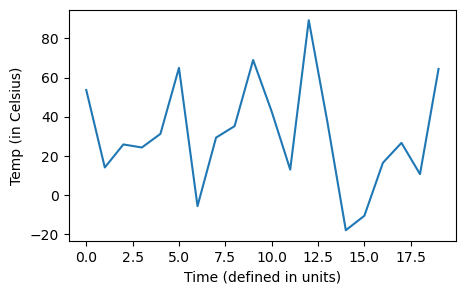

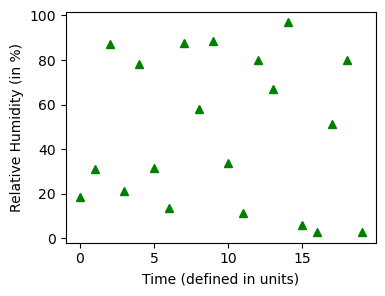

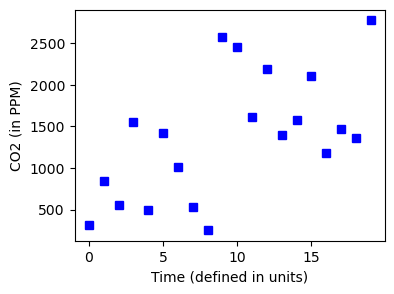

In [14]:
''' Read the data from method and save to a list '''
import matplotlib.pyplot as plt
temp_list = []
hum_list = []
co2_list = []
# generate 20 values for each
for i in range(0,20):
    t, h, c = generate_sensor_data()
    temp_list.append(t)
    hum_list.append(h)
    co2_list.append(c)

''' Use plot to visulize the data'''
plt.figure(figsize=(5, 3))
plt.plot(temp_list)
plt.xlabel('Time (defined in units)')
plt.ylabel('Temp (in Celsius)')
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(hum_list,'g^')
plt.xlabel('Time (defined in units)')
plt.ylabel('Relative Humidity (in %)')
plt.show()

''' Use plot to visulize the data'''
plt.figure(figsize=(4, 3))
plt.plot(co2_list,'bs')
plt.xlabel('Time (defined in units)')
plt.ylabel('CO2 (in PPM)')
plt.show()


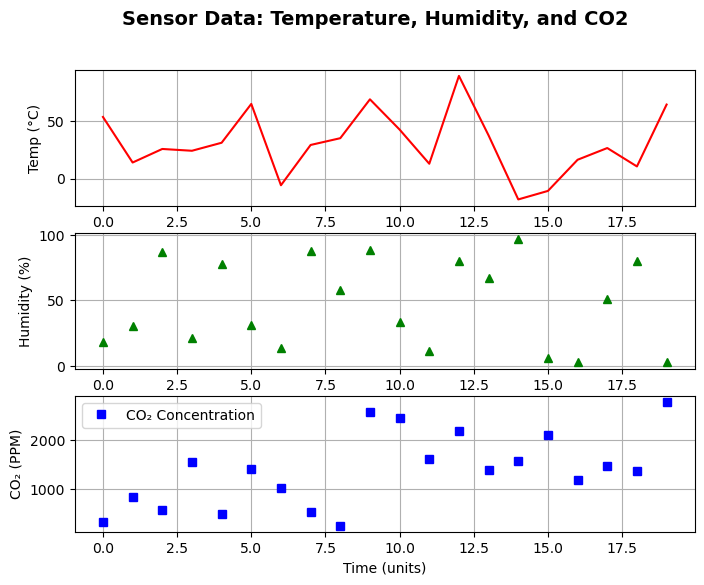

In [28]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))  
# Title for the entire figure
plt.suptitle('Sensor Data: Temperature, Humidity, and CO2', fontsize=14, fontweight='bold')
# First subplot: Temperature
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first plot
plt.plot(temp_list, 'r-', label='Temperature')  # Red line
plt.xlabel('Time (units)')
plt.ylabel('Temp (°C)')
plt.grid(True)
# Second subplot: Humidity
plt.subplot(3, 1, 2)  # 3 rows, 1 column, second plot
plt.plot(hum_list, 'g^', label='Humidity')  # Green triangles
plt.xlabel('Time (units)')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Third subplot: CO2 Concentration
plt.subplot(3, 1, 3)  # 3 rows, 1 column, third plot
plt.plot(co2_list, 'bs', label='CO₂ Concentration')  # Blue squares
plt.xlabel('Time (units)')
plt.ylabel('CO₂ (PPM)')
plt.grid(True)
plt.legend()

# Show the plots
plt.show()


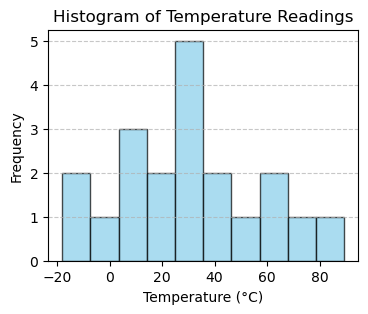

In [32]:
""" Histogram plot for better visualization of overall distribution of the data"""
import matplotlib.pyplot as plt
# Create histogram
plt.figure(figsize=(4, 3))  # Set figure size
plt.hist(temp_list, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature Readings")
# Grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.show()
